In [1]:
# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# keras imports
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
from keras.layers import Input

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

import numpy as np
import glob
import h5py
import os
import json
import datetime
import time
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


[4.06973s]


In [2]:
# config variables
DATASET_PATH = 'dataset/flower17'
OUTPUT_PATH = 'output/flowers17/mobilenet_v2'
seed = 123456

[0.00077s]


In [3]:
model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=Input(shape=(224,224,3)), input_shape=(224,224,3))
image_size = (224, 224)

print ("[INFO] successfully loaded base model and model...")

[INFO] successfully loaded base model and model...
[9.73628s]


In [5]:
# path to training dataset
train_labels = sorted(os.listdir(DATASET_PATH))

# variables to hold features and labels
features = []
labels = []

# loop over all the labels in the folder
count = 1
for label in train_labels:
    cur_path = os.path.join(DATASET_PATH, label)
    count = 1
    for image_path in glob.glob(os.path.join(cur_path, "*.jpg")):
        img = image.load_img(image_path, target_size=image_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = model.predict(x)
        flat = feature.flatten()
        features.append(flat)
        labels.append(label)
        print("[INFO] processed - " + str(count))
        count += 1
    print("[INFO] completed label - " + label)

# encode the labels using LabelEncoder
le = LabelEncoder()
le_labels = le.fit_transform(labels)

assert(list(le.classes_) == train_labels ==
       list(le.inverse_transform(np.arange(17))))

# get the shape of training labels
print("[STATUS] training labels: {}".format(le_labels))
print("[STATUS] training labels shape: {}".format(le_labels.shape))

[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] processed - 33
[INFO] processed - 34
[INFO] processed - 35
[INFO] processed - 36
[INFO] processed - 37
[INFO] processed - 38
[INFO] processed - 39
[INFO] processed - 40
[INFO] processed - 41
[INFO] processed - 42
[INFO] processed - 43
[INFO] processed - 44
[INFO] processed - 45
[INFO] processed - 

[INFO] processed - 50
[INFO] processed - 51
[INFO] processed - 52
[INFO] processed - 53
[INFO] processed - 54
[INFO] processed - 55
[INFO] processed - 56
[INFO] processed - 57
[INFO] processed - 58
[INFO] processed - 59
[INFO] processed - 60
[INFO] processed - 61
[INFO] processed - 62
[INFO] processed - 63
[INFO] processed - 64
[INFO] processed - 65
[INFO] processed - 66
[INFO] processed - 67
[INFO] processed - 68
[INFO] processed - 69
[INFO] processed - 70
[INFO] processed - 71
[INFO] processed - 72
[INFO] processed - 73
[INFO] processed - 74
[INFO] processed - 75
[INFO] processed - 76
[INFO] processed - 77
[INFO] processed - 78
[INFO] processed - 79
[INFO] processed - 80
[INFO] completed label - crocus-番红花
[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO

[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] processed - 33
[INFO] processed - 34
[INFO] processed - 35
[INFO] processed - 36
[INFO] processed - 37
[INFO] processed - 38
[INFO] processed - 39
[INFO] processed - 40
[INFO] processed - 41
[INFO] processed - 42
[INFO] processed - 43
[INFO] processed - 44
[INFO] processed - 45
[INFO] processed - 46
[INFO] processed - 47
[INFO] processed - 48
[INFO] processed - 49
[INFO] processed - 50
[INFO] processed - 51
[INFO] processed - 52
[INFO] processed - 53
[INFO] processed - 54
[INFO] processed - 55
[INFO] processed - 56
[INFO] processed - 57
[INFO] processed - 58
[INFO] processed - 59
[INFO] processed - 60
[INFO] processed - 61
[INFO] pro

[INFO] processed - 66
[INFO] processed - 67
[INFO] processed - 68
[INFO] processed - 69
[INFO] processed - 70
[INFO] processed - 71
[INFO] processed - 72
[INFO] processed - 73
[INFO] processed - 74
[INFO] processed - 75
[INFO] processed - 76
[INFO] processed - 77
[INFO] processed - 78
[INFO] processed - 79
[INFO] processed - 80
[INFO] completed label - sunflower-向日葵
[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[I

In [6]:
print("[INFO] training started...")
# split the training and testing data
(x_train, x_test, y_train, y_test) = train_test_split(np.array(features),
                                                      np.array(le_labels),
                                                      test_size=0.1,
                                                      random_state=seed)

print("[INFO] splitted train and test data...")
print("[INFO] train data  : {}".format(x_train.shape))
print("[INFO] test data   : {}".format(x_test.shape))
print("[INFO] train labels: {}".format(y_train.shape))
print("[INFO] test labels : {}".format(y_test.shape))

# use logistic regression as the model
print("[INFO] creating LR classifier...")
classifier = LogisticRegression(random_state=seed)
classifier.fit(x_train, y_train)

[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (1224, 62720)
[INFO] test data   : (136, 62720)
[INFO] train labels: (1224,)
[INFO] test labels : (136,)
[INFO] creating LR classifier...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123456, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[34.1246s]


In [7]:
# use rank-1 and rank-5 predictions
print("[INFO] evaluating classifier...")
rank_1 = 0
rank_5 = 0

# loop over test data
for (features, label) in zip(x_test, y_test):
    # predict the probability of each class label and
    # take the top-5 class labels
    predictions = classifier.predict_proba(np.atleast_2d(features))[0]
    predictions = np.argsort(predictions)[::-1][:5]

    # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1

    # rank-5 prediction increment
    if label in predictions:
        rank_5 += 1

# convert accuracies to percentages
rank_1 = (rank_1 / float(len(y_test))) * 100
rank_5 = (rank_5 / float(len(y_test))) * 100

# write the accuracies to file
print("Rank-1: {:.2f}%".format(rank_1))
print("Rank-5: {:.2f}%\n".format(rank_5))

[INFO] evaluating classifier...
Rank-1: 98.53%
Rank-5: 100.00%

[0.17201s]


In [8]:
# evaluate the model of test data
preds = classifier.predict(x_test)

# write the classification report to file
print("{}".format(classification_report(y_true=y_test, y_pred=preds, target_names=le.classes_)))

                precision    recall  f1-score   support

 bluebell-蓝风铃草       1.00      1.00      1.00         4
 buttercup-金凤花       1.00      1.00      1.00         9
 coltsfoot-款冬花       0.89      1.00      0.94         8
   cowslip-驴蹄草       0.86      1.00      0.92         6
    crocus-番红花       1.00      1.00      1.00        10
  daffodil-水仙花       1.00      0.88      0.93         8
      daisy-雏菊       1.00      1.00      1.00        12
 dandelion-蒲公英       1.00      0.83      0.91         6
 fritillary-贝母       1.00      1.00      1.00         6
      iris-鸢尾花       1.00      1.00      1.00        10
lilyvalley-野百合       1.00      1.00      1.00        10
     pansy-三色堇       1.00      1.00      1.00         8
  snowdrop-雪莲花       1.00      1.00      1.00         8
 sunflower-向日葵       1.00      1.00      1.00        10
tigerlily-虎皮百合       1.00      1.00      1.00         9
     tulip-郁金香       1.00      1.00      1.00         7
windflower-银莲花       1.00      1.00      1.00  

[INFO] confusion matrix


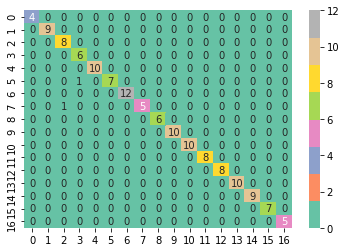

[0.88018s]


In [13]:
# display the confusion matrix
print("[INFO] confusion matrix")

# plot the confusion matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm,annot=True,cmap="Set2")
plt.show()

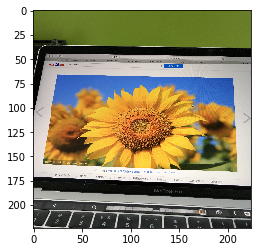

sunflower-向日葵   0.8345204586466128
coltsfoot-款冬花   0.13097606988964722
tigerlily-虎皮百合  0.032410364990067816
crocus-番红花      0.0006776145002542243
daffodil-水仙花    0.0003819612815133806
lilyvalley-野百合  0.0002244652506748599
pansy-三色堇       0.0002150253962848541
cowslip-驴蹄草     0.00020611870659221254
daisy-雏菊        0.00018955082788315173
dandelion-蒲公英   7.865532846519603e-05
fritillary-贝母   3.4585216516560704e-05
iris-鸢尾花        2.603138596376472e-05
snowdrop-雪莲花    2.552644635637993e-05
bluebell-蓝风铃草   1.9083354463376514e-05
windflower-银莲花  1.1116225910184909e-05
tulip-郁金香       2.8062407255325946e-06
buttercup-金凤花   5.663120686043146e-07
[0.44472s]


In [33]:
my_image = '2.jpg'

img = image.load_img(my_image, target_size=image_size)
x = image.img_to_array(img)

plt.imshow(x/255)
plt.show()

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
feature = model.predict(x)
flat = feature.reshape(1, -1)

predictions = classifier.predict_proba(flat)[0]

label_pred = le.inverse_transform(np.argsort(predictions)[::-1])
prob_pred = np.sort(predictions)[::-1]

for label, prob in zip(label_pred, prob_pred):
    print('{:16}{}'.format(label, prob))